Step 1: Define Government Posts with Images
First, we'll define the government posts along with their titles, content, and associated images.

In [2]:
import pandas as pd

# Define government posts
gov_posts = {
    "transportation_subsidy": {
        "title": "N10,000 Transport Allowance for Low-Income Earners",
        "content": "The federal government has approved a monthly transport subsidy of N10,000 to reduce the burden of rising transport costs.",
        "image_url": "https://example.com/transport.jpg"  # Replace with actual image URL
    },
    "digital_training": {
        "title": " 3MTT:Free Digital Skills Training for Nigerian Youths",
        "content": "The Ministry of Innovation is launching training programs in 12 courses nationwide to train Nigeria youths and make Nigeria a net exporter of global talents.",
        "image_url": "https://example.com/training.jpg"  # Replace with actual image URL
    },
    "electricity_tariff": {
        "title": "Revised Electricity Tariffs from July",
        "content": "NERC has announced a new electricity tariff regime set to take effect July 1. Citizens are invited to share feedback.",
        "image_url": "https://example.com/electricity.jpg"  # Replace with actual image URL
    }
}

# Convert to DataFrame for display
gov_df = pd.DataFrame([
    {"Post ID": k, "Title": v["title"], "Content": v["content"], "Image URL": v["image_url"]}
    for k, v in gov_posts.items()
])

gov_df


,Post ID,Title,Content,Image URL
0,transportation_subsidy,"N10,000 Transport Allowance for Low-Income Ear...",The federal government has approved a monthly ...,https://example.com/transport.jpg
1,digital_training,3MTT:Free Digital Skills Training for Nigeria...,The Ministry of Innovation is launching traini...,https://example.com/training.jpg
2,electricity_tariff,Revised Electricity Tariffs from July,NERC has announced a new electricity tariff re...,https://example.com/electricity.jpg


 Step 2: Generate Audio Feedback with gTTS
Now, we'll generate audio files simulating citizen feedback for each post.

In [5]:
#  Install Required Libraries
!pip install gTTS transformers torchaudio librosa --quiet
!pip install git+https://github.com/openai/whisper.git --quietfrom gtts import gTTS

from gtts import gTTS

# Citizen responses to each post
scripts = {
    "transportation_subsidy": "This N10,000 transport allowance is helpful, but will it really reach the right people?",
    "digital_training": "I'm excited about the free digital training. I hope the trainers are qualified.",
    "electricity_tariff": "Tariff hike again? This will increase the cost of everything. We need a better solution."
}

# Generate audio files
for key, text in scripts.items():
    tts = gTTS(text)
    tts.save(f"{key}.mp3")

print("🎧 Audio feedback generated and saved.")



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quietfrom
🎧 Audio feedback generated and saved.


Step 3: Transcribe Audio with Whisper
We'll transcribe the generated audio files into text using OpenAI's Whisper model.

In [7]:
!pip install -q git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install -y ffmpeg

import whisper

# Load the Whisper model
model = whisper.load_model("base")

# Function to transcribe audio
def transcribe_audio(file_path):
    result = model.transcribe(file_path)
    return result['text']

# Transcribe all audio files
transcriptions = {key: transcribe_audio(f"{key}.mp3") for key in scripts}
print("📝 Transcriptions:", transcriptions)


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,939 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 80.7MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


📝 Transcriptions: {'transportation_subsidy': ' This N10,000 transport allowances helpful, but will it really reach the right people?', 'digital_training': " I'm excited about the free digital training. I hope the trainers are qualified.", 'electricity_tariff': ' Terif hike again? This will increase the cost of everything. We need a better solution.'}


Step 4: Perform Sentiment Analysis
We’ll use Hugging Face's transformers pipeline to detect whether the sentiment of each transcription is positive, neutral, or negative.

In [8]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Analyze sentiments
sentiments = {key: sentiment_pipeline(text)[0] for key, text in transcriptions.items()}

# Display results
print("🎯 Sentiment Analysis Results:")
for key, sentiment in sentiments.items():
    print(f"{key}: {sentiment}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


🎯 Sentiment Analysis Results:
transportation_subsidy: {'label': 'NEGATIVE', 'score': 0.8736526966094971}
digital_training: {'label': 'POSITIVE', 'score': 0.9995214939117432}
electricity_tariff: {'label': 'NEGATIVE', 'score': 0.9957354068756104}


Step 5: Display Summary Table + Graph

This step will: Create a Pandas DataFrame showing:
The post title,Transcribed feedback,Sentiment label,Sentiment score
Display a bar chart of sentiments for quick visual insight

<ipython-input-12-a682588ad454>:36: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


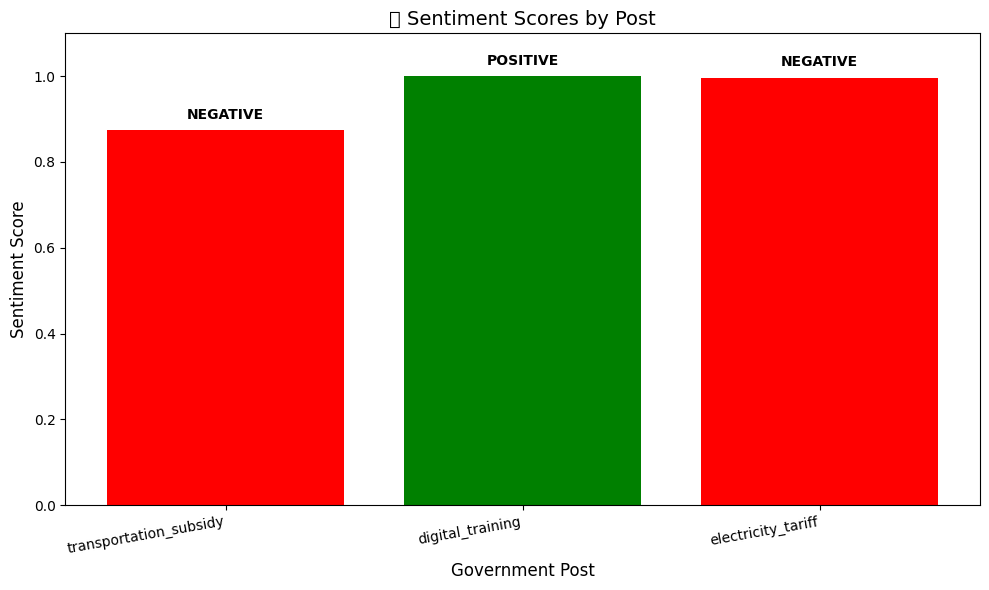

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the DataFrame again (optional if already exists)
summary = pd.DataFrame({
    "Post Title": list(scripts.keys()),
    "Transcription": list(transcriptions.values()),
    "Sentiment Label": [sentiments[k]['label'] for k in sentiments],
    "Sentiment Score": [sentiments[k]['score'] for k in sentiments]
})

# Set color based on sentiment
colors = summary["Sentiment Label"].map({
    "POSITIVE": "green",
    "NEGATIVE": "red",
    "NEUTRAL": "gray"  # Optional, in case any are neutral
})

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(summary["Post Title"], summary["Sentiment Score"], color=colors)
plt.title("📈 Sentiment Scores by Post", fontsize=14)
plt.xlabel("Government Post", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.ylim(0, 1.1)

# Add sentiment labels above each bar
for bar, label in zip(bars, summary["Sentiment Label"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, label,
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=10, ha='right')

plt.tight_layout()
plt.show()


Government Post Sample


In [13]:
# Government Posts with Title, Description, and Image
government_posts = {
    "new_tax_reform": {
        "title": "New Tax Reform Bill 2025",
        "description": "The federal government has introduced a tax reform bill targeting VAT and small businesses. The aim is to expand revenue but there are concerns about burdening citizens.",
        "image_url": "https://images.unsplash.com/photo-1588776814546-badf18441c7d"  # Replace with more relevant image if you like
    },
    "3mtt_initiative": {
        "title": "3MTT Digital Skills Initiative",
        "description": "The 3MTT program trained over 30,000 youths in digital skills like Data Analysis, Frontend Development, and more. Government is assessing its workplace impact.",
        "image_url": "https://images.unsplash.com/photo-1618044733300-9685a5f1cd3c"
    },
    "yiedep_employment": {
        "title": "YIEDEP Employment Scheme",
        "description": "YIEDEP targets young entrepreneurs and unemployed youths with interest-free loans and startup support. Feedback on implementation is requested.",
        "image_url": "https://images.unsplash.com/photo-1584467735871-fb4be12d82f9"
    }
}


In [14]:
from IPython.display import display, HTML

def display_government_posts(posts):
    for key, post in posts.items():
        html_block = f"""
        <div style="border:1px solid #ccc; padding:16px; border-radius:10px; margin-bottom:20px;">
            <h2 style="color:#2c3e50;">{post['title']}</h2>
            <img src="{post['image_url']}" style="max-width:100%; height:auto; border-radius:10px; margin-top:10px;">
            <p style="font-size:15px; color:#34495e; margin-top:10px;">{post['description']}</p>
        </div>
        """
        display(HTML(html_block))

display_government_posts(government_posts)


In [20]:
# Updated government posts with working image links
government_posts = {
    "new_tax_reform": {
        "title": "New Tax Reform Bill 2025",
        "description": "The federal government has introduced a tax reform bill targeting VAT and small businesses. The aim is to expand revenue but there are concerns about burdening citizens.",
        "image_url": "https://fiscalreforms.ng/wp-content/uploads/2024/10/Tax-reforms-bill-2048x1146.jpg"
    },
    "3mtt_initiative": {
        "title": "3MTT Digital Skills Initiative",
        "description": "The 3MTT program trained over 30,000 youths in digital skills like Data Analysis, Frontend Development, and more. Government is assessing its workplace impact.",
        "image_url": "https://www.opportunitiesforafricans.com/wp-content/uploads/2023/10/nitda-3mtt.jpg"
    },
    "yiedep_employment": {
        "title": "YIEDEP Employment Scheme",
        "description": "YIEDEP targets young entrepreneurs and unemployed youths with interest-free loans and startup support. Feedback on implementation is requested.",
        "image_url": "https://cdn.pixabay.com/photo/2015/07/17/22/43/student-849825_960_720.jpg"
    }
}


In [21]:
from IPython.display import display, HTML

def display_government_posts(posts):
    for key, post in posts.items():
        html_block = f"""
        <div style="border:1px solid #ccc; padding:16px; border-radius:10px; margin-bottom:20px;">
            <h2 style="color:#2c3e50;">{post['title']}</h2>
            <img src="{post['image_url']}" style="max-width:100%; height:auto; border-radius:10px; margin-top:10px;">
            <p style="font-size:15px; color:#34495e; margin-top:10px;">{post['description']}</p>
        </div>
        """
        display(HTML(html_block))

display_government_posts(government_posts)


Step-by-Step: Export to Google Sheets in Colab
Step 1: Install and authenticate

In [22]:
!pip install --upgrade gspread gspread_dataframe oauth2client --quiet
from google.colab import auth
auth.authenticate_user()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.0 MB/s eta 0:00:00


Step 2: Authorize Google Sheets access

In [23]:
import gspread
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)


Step 3: Save to Google Sheet

In [24]:
import pandas as pd
from gspread_dataframe import set_with_dataframe

# Assuming `summary` contains your full feedback summary
sheet_name = "Policy Feedback Summary"
spreadsheet = gc.create(sheet_name)
worksheet = spreadsheet.get_worksheet(0)

# Update sheet with the summary dataframe
set_with_dataframe(worksheet, summary)

print("✅ Data uploaded to Google Sheets successfully!")
print("🔗 Open your sheet:", spreadsheet.url)


✅ Data uploaded to Google Sheets successfully!
🔗 Open your sheet: https://docs.google.com/spreadsheets/d/1h9GLHj7AP11SixR-Hga5y4TjhGJ4jHx-UNezZw3nlYM


In [25]:
import pandas as pd
from datetime import datetime

# Simulated user submission
def collect_feedback():
    print("Welcome to the Feedback Portal!\n")

    for post_id, post in gov_posts.items():
        print(f"\n🗞️  [{post_id}] {post['title']}")
        print(post['content'])
        print("Do you want to submit feedback to this? (yes/no)")
        choice = input(">> ").strip().lower()

        if choice == 'yes':
            name = input("Enter your name: ")
            response = input("Your feedback: ")
            timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

            submission = {
                "Post ID": post_id,
                "Title": post['title'],
                "Name": name,
                "Feedback": response,
                "Time": timestamp
            }

            feedback_data.append(submission)

# Store responses
feedback_data = []

# Call the function
collect_feedback()

# Convert to DataFrame
feedback_df = pd.DataFrame(feedback_data)
feedback_df.head()


Welcome to the Feedback Portal!


🗞️  [transportation_subsidy] N10,000 Transport Allowance for Low-Income Earners
The federal government has approved a monthly transport subsidy of N10,000 to reduce the burden of rising transport costs.
Do you want to submit feedback to this? (yes/no)
>> no

🗞️  [digital_training]  3MTT:Free Digital Skills Training for Nigerian Youths
The Ministry of Innovation is launching training programs in 12 courses nationwide to train Nigeria youths and make Nigeria a net exporter of global talents.
Do you want to submit feedback to this? (yes/no)
>> yes
Enter your name: fatimah
Your feedback: it is a very good scheme

🗞️  [electricity_tariff] Revised Electricity Tariffs from July
NERC has announced a new electricity tariff regime set to take effect July 1. Citizens are invited to share feedback.
Do you want to submit feedback to this? (yes/no)
>> no


,Post ID,Title,Name,Feedback,Time
0,digital_training,3MTT:Free Digital Skills Training for Nigeria...,fatimah,it is a very good scheme,2025-05-15 14:56:46


In [27]:
import gspread
from google.auth import default

# Authenticate
creds, _ = default()
gc = gspread.authorize(creds)

# Open Google Sheet
sheet = gc.open("Policy Feedback Summary")  # Use your exact sheet name

# Add a new worksheet if not already there
try:
    worksheet = sheet.worksheet("Text Feedback")
except:
    worksheet = sheet.add_worksheet(title="Text Feedback", rows="1000", cols="20")

# Clear old data (if any)
worksheet.clear()

# Upload new feedback_df
worksheet.update([feedback_df.columns.values.tolist()] + feedback_df.values.tolist())


{'spreadsheetId': '1h9GLHj7AP11SixR-Hga5y4TjhGJ4jHx-UNezZw3nlYM',
 'updatedRange': "'Text Feedback'!A1:E2",
 'updatedRows': 2,
 'updatedColumns': 5,
 'updatedCells': 10}

In [28]:
from transformers import pipeline

# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Run sentiment analysis
feedback_df["Sentiment"] = feedback_df["Feedback"].apply(lambda x: sentiment_pipeline(x)[0]["label"])
feedback_df.head()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,Post ID,Title,Name,Feedback,Time,Sentiment
0,digital_training,3MTT:Free Digital Skills Training for Nigeria...,fatimah,it is a very good scheme,2025-05-15 14:56:46,POSITIVE


In [29]:
grouped = feedback_df.groupby("Title")

for title, group in grouped:
    print(f"\n🗞️ {title}")
    display(group[["Name", "Feedback", "Sentiment", "Time"]])



🗞️  3MTT:Free Digital Skills Training for Nigerian Youths


,Name,Feedback,Sentiment,Time
0,fatimah,it is a very good scheme,POSITIVE,2025-05-15 14:56:46


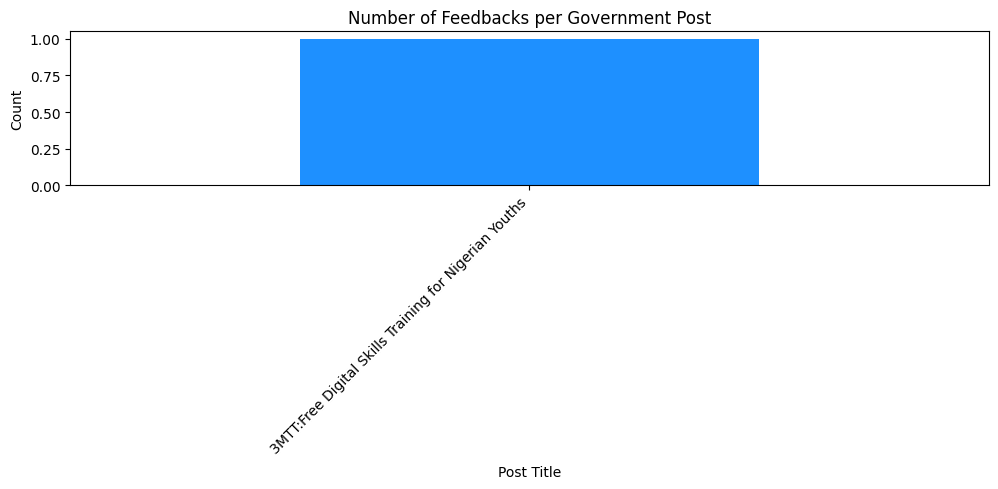

<Figure size 1000x600 with 0 Axes>

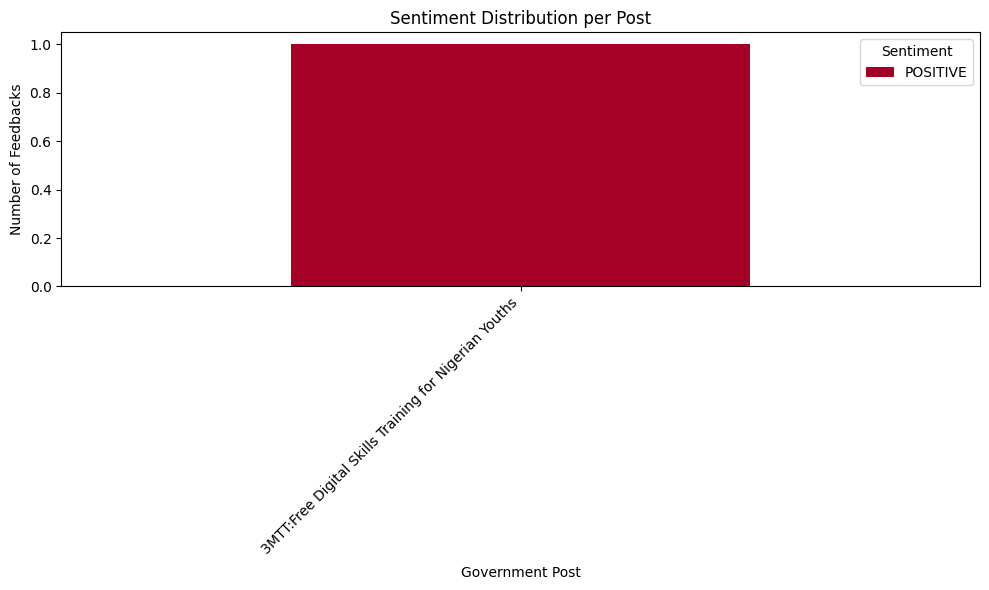

,Title,Total Feedbacks,Top Sentiment
0,3MTT:Free Digital Skills Training for Nigeria...,1,POSITIVE


In [30]:
# Admin Dashboard Visuals

import matplotlib.pyplot as plt
import seaborn as sns

# === Number of Feedbacks per Government Post ===
plt.figure(figsize=(10,5))
feedback_df["Title"].value_counts().plot(kind="bar", color="dodgerblue")
plt.title("Number of Feedbacks per Government Post")
plt.xlabel("Post Title")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# === Sentiment Breakdown by Post ===
plt.figure(figsize=(10,6))
sentiment_summary = pd.crosstab(feedback_df["Title"], feedback_df["Sentiment"])
sentiment_summary.plot(kind="bar", stacked=True, colormap="RdYlGn", figsize=(10,6))
plt.title("Sentiment Distribution per Post")
plt.xlabel("Government Post")
plt.ylabel("Number of Feedbacks")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

# === Summary Table ===
summary = feedback_df.groupby("Title").agg({
    "Feedback": "count",
    "Sentiment": lambda x: x.value_counts().idxmax()
}).rename(columns={"Feedback": "Total Feedbacks", "Sentiment": "Top Sentiment"})

summary.reset_index()
